In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
from sklearn import metrics

In [2]:
%load_ext autotime

### Question-1:
#### Part-1:

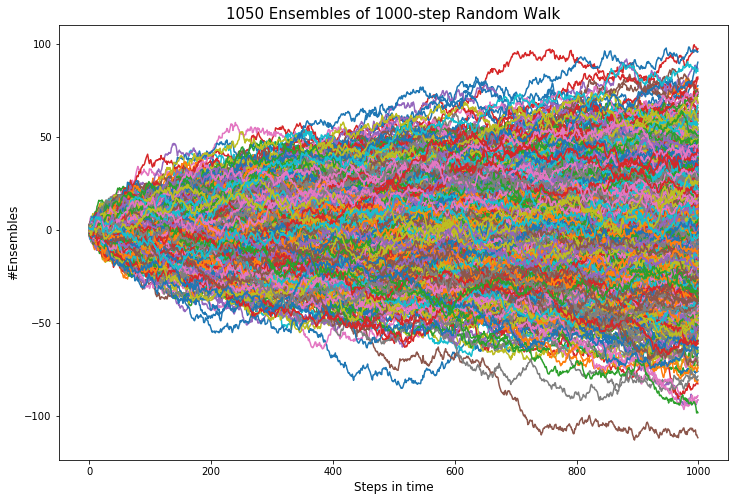

In [37]:
ens = 1050
steps = 1000

def plot_random_walks(ens, steps):
    walks = []
    temp = np.random.randn(ens)
    walks.append(temp)

    for i in range(1, steps):
        temp_new = walks[i-1] + np.random.randn(ens)
        walks.append(temp_new)
        
#     walks_2 = [walks[i-1] + np.random.randn(ens) for i in range(1, steps)]

    walks_mat = np.matrix(walks)

    fig, ax = plt.subplots(figsize = (12,8))
    ax.plot(walks_mat)
    ax.set_xlabel('Steps in time', fontsize = 12)
    ax.set_ylabel('#Ensembles', fontsize = 12)
    ax.set_title('{} Ensembles of {}-step Random Walk'.format(ens, steps), fontsize = 15)
    plt.show()
    
    return walks_mat

walks_mat = plot_random_walks(ens = ens, steps = steps)

#### Part-2:

In [83]:
variances = np.array(np.var(walks_mat, 1)).reshape(-1,).tolist()
means = np.array(np.mean(walks_mat, 1)).reshape(-1,).tolist()

time: 15.6 ms


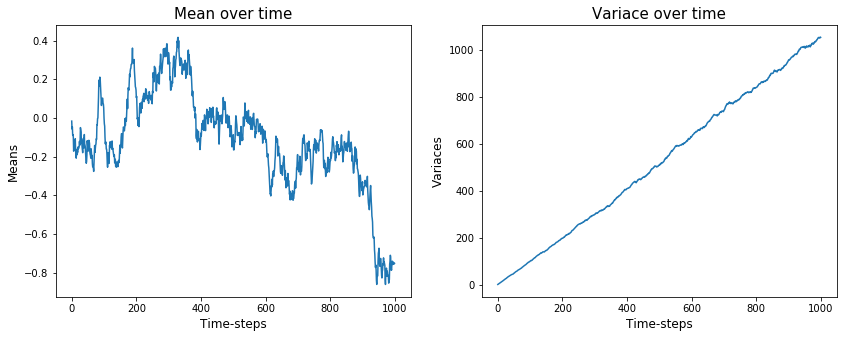

time: 391 ms


In [85]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize = (14,5))
ax1.plot(means)
ax2.plot(variances)

ax1.set_xlabel('Time-steps', fontsize = 12)
ax2.set_xlabel('Time-steps', fontsize = 12)

ax1.set_ylabel('Means', fontsize = 12)
ax2.set_ylabel('Variances', fontsize = 12)

ax1.set_title('Mean over time', fontsize = 15)
ax2.set_title('Variance over time', fontsize = 15)

plt.show()

#### Part-3:

#### From the above two plots, we can infer following:

1. The means of random walks will fluctuate around some horizontal line in the long-run. So, these walks will eventually become stationary.

2. The variance increases over time linearly. So, at any given point of time, it'll be function of time only.

#### Part-4:

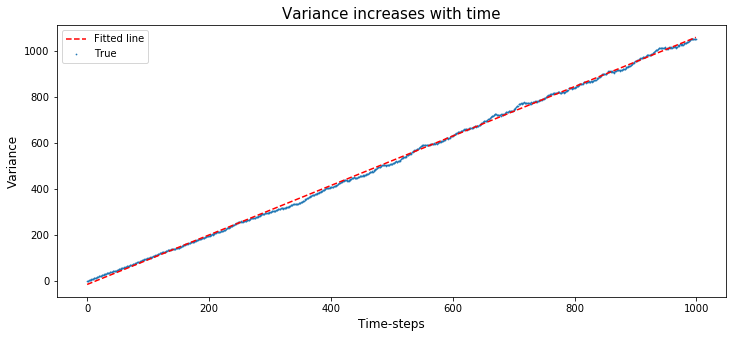

time: 313 ms


In [87]:
coefs = np.polyfit(range(steps), variances, deg = 1)
steps_range = np.arange(steps)
fit_line = np.poly1d(coefs)

fig, ax = plt.subplots(figsize = (12,5))
ax.scatter(steps_range, variances, 0.5,  label = 'True')
ax.plot(steps_range, fit_line(steps_range), 'r--', label = 'Fitted line')
ax.legend()
ax.set_xlabel('Time-steps', fontsize = 12)
ax.set_ylabel('Variance', fontsize = 12)
ax.set_title('Variance increases with time', fontsize = 15)
plt.show()

#### As we saw in the previous plot (visually) that variance increases linearly. Here, we can see a very-good linear fit (red-dashed-line) to the variance of the previous plot. It means that it agrees with the theory.

### Question-2:

In [102]:
sig = 10
rho = 27
beta = 8/3

tim = 0.005

all_x_t = np.arange(1.001, 1.1, 0.001).reshape(1,100)
y_t = 1
z_t = 1

x_all = []
y_all = []
z_all = []

for ens in range(100):
    x = []
    y = []
    z = []
    x_t = all_x_t[0,ens]
    
    for t in range(1000):
        x_t = x_t + sig*(y_t - x_t)*tim
        y_t = y_t + (x_t*rho - x_t*z_t - y_t)*tim
        z_t = z_t + (x_t*y_t - beta*z_t)*tim      

        x.append(x_t)
        y.append(y_t)
        z.append(z_t)

    x_all.append(x)
    y_all.append(y)
    z_all.append(z)
    
    y_t = 1
    x_t = 1
    z_t = 1

If we increase the #time-steps from 1000 to some higher number, then we get better plot!!


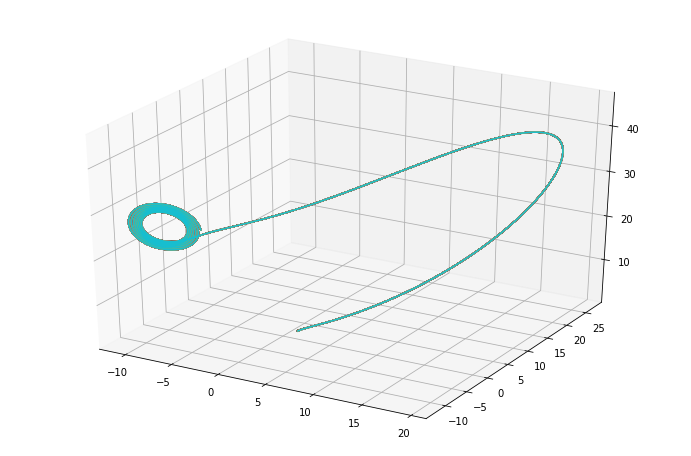

In [103]:
print ('If we increase the #time-steps from 1000 to some higher number, then we get better plot!!')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (12,8))
ax = fig.gca(projection='3d')
for lor in range(100):
    ax.plot(x_all[lor], y_all[lor], z_all[lor])
plt.show()

In [104]:
def plot_mean_variance(means, variances):
    
    fig, (ax1, ax2) = plt.subplots(figsize = (14,6), ncols = 2, nrows = 1)
    ax1.scatter(x = np.arange(100),  y = means)
    ax1.set_xlabel('Time', fontsize = 15)
    ax1.set_ylabel('Mean', fontsize = 15)
    ax1.set_title('Mean over time', fontsize = 20)

    ax2.scatter(x = np.arange(100),  y = variances)
    ax2.set_xlabel('Time', fontsize = 15)
    ax2.set_ylabel('Variance', fontsize = 15)
    ax2.set_title('Variance over time', fontsize = 20)
    ax2.set_ylim(30,50)

    plt.show()
    
    return None

### For X-variable:

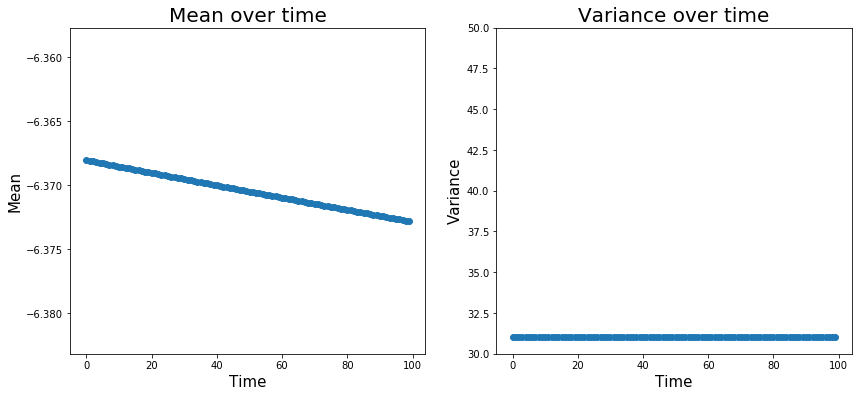

In [88]:
x_means = [np.mean(lor) for lor in x_all]
x_vars = [np.var(lor) for lor in x_all]
plot_mean_variance(x_means, x_vars)

### For Y-variable:

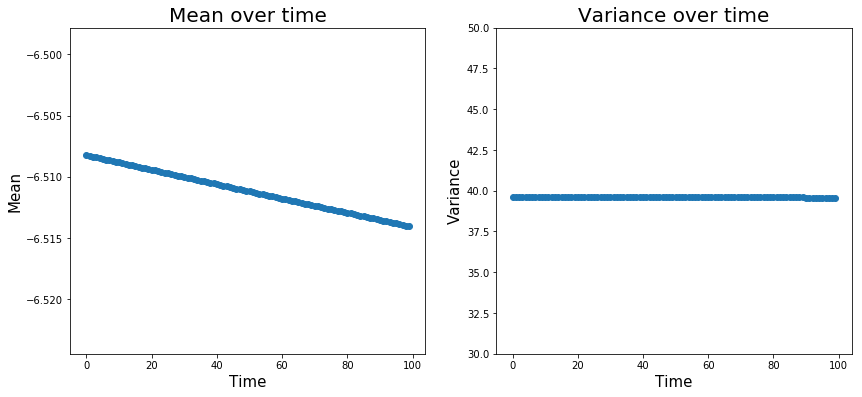

In [89]:
y_means = [np.mean(lor) for lor in y_all]
y_vars = [np.var(lor) for lor in y_all]
plot_mean_variance(y_means, y_vars)

### For Z-variable:

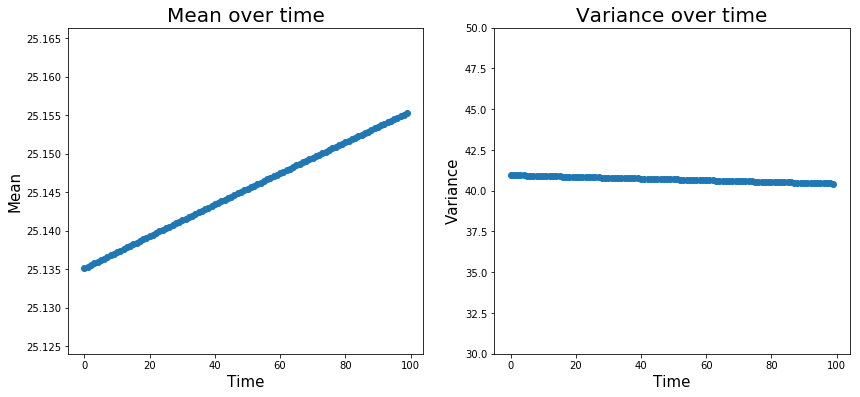

In [90]:
z_means = [np.mean(lor) for lor in z_all]
z_vars = [np.var(lor) for lor in z_all]
plot_mean_variance(z_means, z_vars)

### Sensitivity analysis of Lorenz:

From above 6 plots for X,Y, and Z variables, we can observe following:

1. Plotting variances of three variables on the same Y-scale, we see that variances of three variables stay almost constant over time.

2. We see some increasing and decreasing trends in means of variable, but the change seems insignificant.

### Question-3:

In [169]:
fs = 10e3
N = 1e3
amp = 2*np.sqrt(2)
sin_freq = 1500
cos_freq = 500
#noise_power = 0.001 * fs / 2
time = np.arange(N) / fs

x = amp*np.sin(2*np.pi*sin_freq*time) + np.random.randn(len(time))

#### Part-1: Sine wave + noise

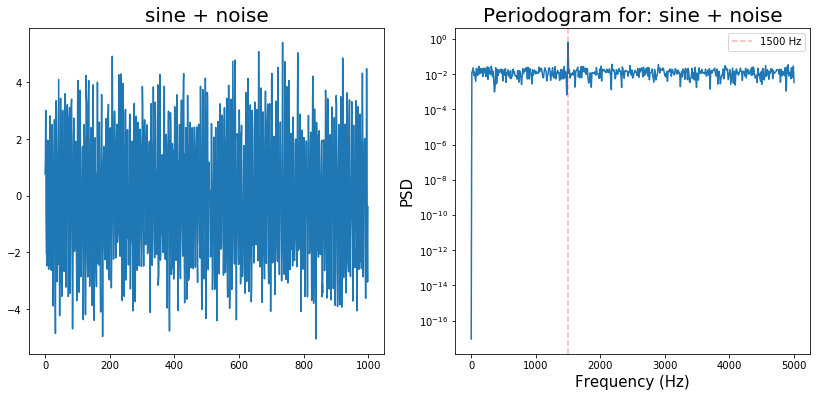

In [170]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (14,6))  

ax1.plot(x)
ax1.set_title('sine + noise', fontsize = 20)

from scipy import signal
f, per = signal.periodogram(x, fs)
ax2.semilogy(f, np.sqrt(per))
ax2.set_xlabel('Frequency (Hz)', fontsize = 15)
ax2.set_ylabel('PSD', fontsize = 15)
ax2.set_title('Periodogram for: sine + noise', fontsize = 20)
ax2.axvline(x = 1500, c = 'red', alpha = 0.3, linestyle = 'dashed', label = '{} Hz'.format(sin_freq))
ax2.legend()
plt.show()

#### Part-2: Combination of Sine and Cosine

In [171]:
x = amp*np.sin(2*np.pi*sin_freq*time)
y = amp*np.cos(2*np.pi*cos_freq*time)
noise = np.random.randn(2000)
z = np.concatenate((x,y)) + noise

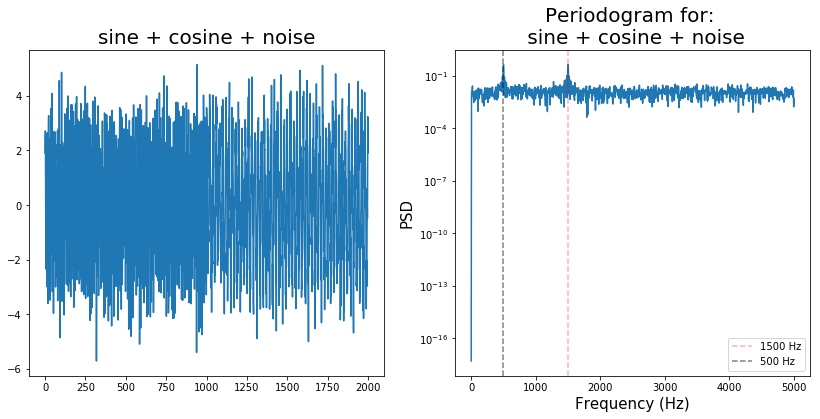

In [173]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (14,6))  

ax1.plot(z)
ax1.set_title('sine + cosine + noise', fontsize = 20)

f, per = signal.periodogram(z, fs)
ax2.semilogy(f, np.sqrt(per))
ax2.set_xlabel('Frequency (Hz)', fontsize = 15)
ax2.set_ylabel('PSD', fontsize = 15)
ax2.set_title('Periodogram for: \n sine + cosine + noise', fontsize = 20)
ax2.axvline(x = 1500, c = 'red', alpha = 0.3, linestyle = 'dashed', label = '{} Hz'.format(sin_freq))
ax2.axvline(x = 500, c = 'k', alpha = 0.5, linestyle = 'dashed', label = '{} Hz'.format(cos_freq))
ax2.legend()
plt.show()

#### Part-3: Variable frequency wave: Spectrogram analysis

In [87]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
sin_freq = 1000
cos_freq = 1700
#noise_power = 0.001 * fs / 2
time = np.arange(N) / fs

x = amp*np.sin(2*np.pi*sin_freq*time)
y = amp*np.cos(2*np.pi*cos_freq*time)
z = np.concatenate((x,y))

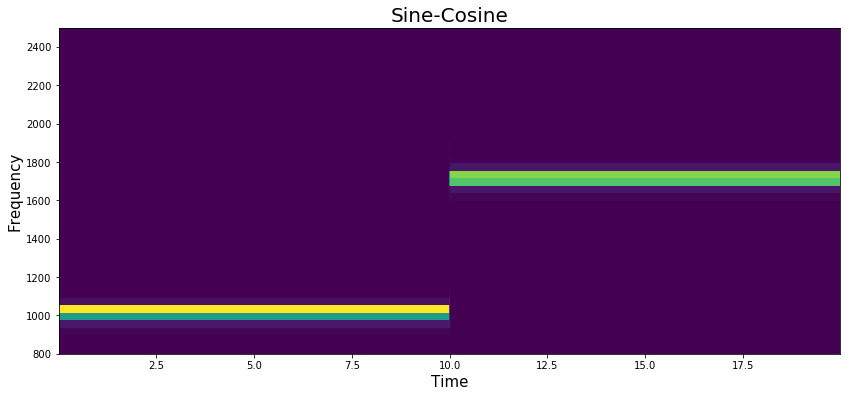

In [93]:
fig, ax = plt.subplots(figsize = (14,6))

f_sc, t_sc, spec_sc = signal.spectrogram(z, fs)

ax.set_ylim(800,2500)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Time', fontsize = 15)

ax.pcolormesh(t_sc, f_sc, spec_sc)
ax.set_title('Sine-Cosine', fontsize = 20)

plt.show()


### Question-4:

In [111]:
sig = 10
rho = 27
beta = 8/3

y = []
x = []
z = []

y_t = 1
x_t = 1
z_t = 1
tim = 0.005

for t in range(8000):
#     t = t/100
    
    x_t = x_t + sig*(y_t - x_t)*tim
    y_t = y_t + (x_t*rho - x_t*z_t - y_t)*tim
    z_t = z_t + (x_t*y_t - beta*z_t)*tim
    
    x.append(x_t)
    y.append(y_t)
    z.append(z_t)

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (12,8))
ax = fig.gca(projection='3d')
ax.plot(x, y, z)
plt.show()

### Yet to understand Phase-Space Reconstruction so couldn't write code for that on my own!

In [4]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

dt = 0.01
stepCnt = 10000

xs = np.empty((stepCnt+1,))
ys = np.empty((stepCnt+1,))
zs = np.empty((stepCnt+1,))

xs[0],ys[0],zs[0] = (1.001,1.0,1.05)

for i in range(stepCnt):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])

    xs[i+1] = xs[i] + (x_dot*dt)
    ys[i+1] = ys[i] + (y_dot*dt)
    zs[i+1] = zs[i] + (z_dot*dt)

In [24]:
tau_max = 1000

def phase_space_rec(dim, t1 = 1, t2 = 2):
    
    """
    dim: Provide variable (either X or Y or Z)
    
    """
    mi_score_x = []

    for tau in range(1, tau_max):
        unlagged = dim[:-tau]
        lagged = np.roll(dim, -tau)[:-tau]
        mi_score_x.append(metrics.normalized_mutual_info_score(unlagged, lagged))
        if len(mi_score_x) > 1 and mi_score_x[-2] < mi_score_x[-1]: # return first local minima
            tau -= 1
            print (tau)
        break

    figure = plt.figure()
    axes = Axes3D(figure)
    data_lag0 = xs.flatten()
    data_lag1 = np.roll(dim, -t1*tau).flatten()
    data_lag2 = np.roll(dim, -t2*tau).flatten()
    axes.plot3D(data_lag0, data_lag1, data_lag2)
    figure.add_axes(axes)
    plt.show()
    
    return None

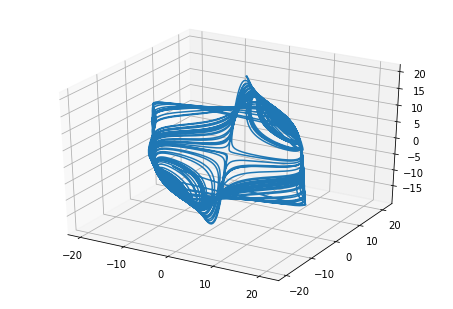

In [26]:
phase_space_rec(xs, 19, 38)

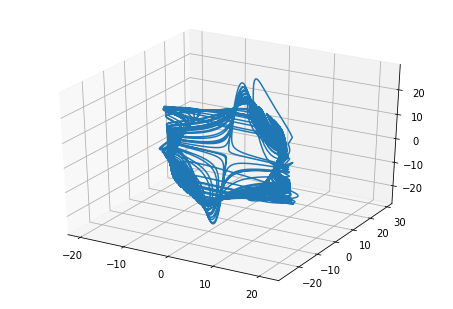

In [29]:
phase_space_rec(ys, 19, 38)

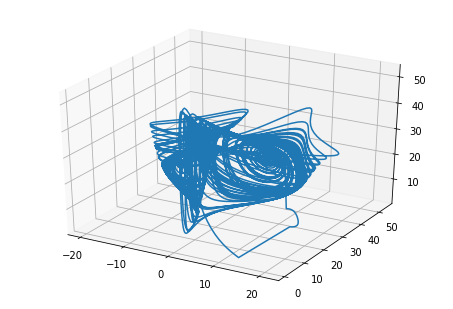

In [30]:
phase_space_rec(zs, 19, 38)

#### Add noise to X-variable:

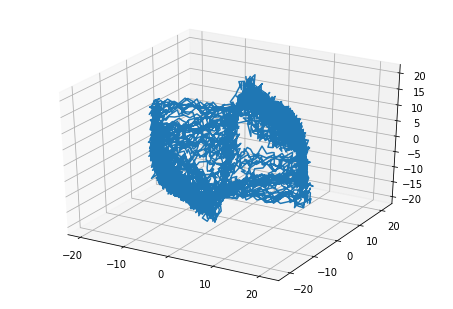

In [34]:
xs_noise = xs + np.random.randn(10001)
phase_space_rec(xs_noise, 19, 38)

### Observation:
#### After adding the noise, it seems that the lines do not stay smooth but the overall shape stays the same.

### Question-5:

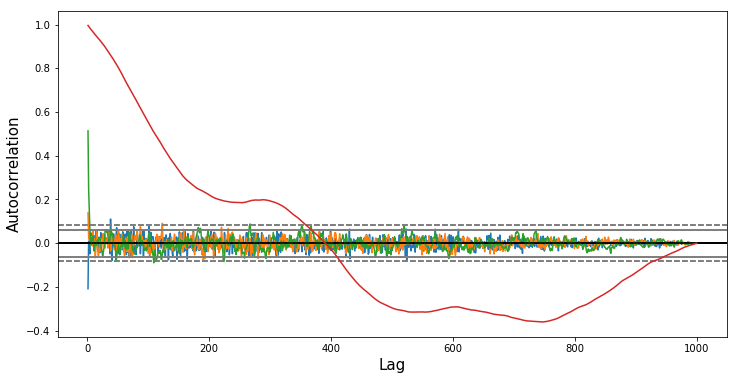

In [44]:
alpha = [-0.2, 0.2, 0.5, 1]
# alpha = [1.005]

def plot_autocorrelation(alpha):
    y_all = []

    for i in alpha:    
        y_init = np.random.randn()
        y_temp = []
        y_temp.append(y_init)

        for j in range(1,1000):
            val = i*y_temp[j-1] + np.random.randn()
            y_temp.append(val)
        y_all.append(y_temp)
        
    auto_cor_df = pd.DataFrame(y_all).T
    
    fig, ax = plt.subplots(figsize = (12,6))
    ax.set_xlabel('Lag', fontsize = 15)
    ax.set_ylabel('Autocorrelation', fontsize = 15)

    for i in range(auto_cor_df.shape[1]):
        pd.plotting.autocorrelation_plot(auto_cor_df.iloc[:,i], ax=ax)

    plt.show()
    
    return None

plot_autocorrelation(alpha)

#### Explanation:

1. From the above autocorrelation plot, we see that for alpha = 1 (red-line), it takes many lags to become statistically insignificant. 

2. For alpha = -0.2, it is not statistically significant for two SD. For lag ~160, it goes out of 95% CI bounds but does not seem very much significant. It starts off with negative correlation as alpha < 0 (unlike previous point where alpha > 0).
- If we decrease alpha further, then it'll start off with stronger -ve autocorreltaion.

3. For alpha = 0.5 and 0.2, it also does not seem statistically signifucant.

For higher values of alpha, the variance of series decreases slowly as compared to lower values of alpha. Meaning that if alpha is higher, then it **'almost'** resembles to a random-walk, and for alpha = 1, it's actually a random-walk.

> We can say that except for alpha = 1, time-series is stationary.